In [8]:
df_recency = df.groupby(by='Customer Name',
                        as_index=False)['Order Date'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

In [ ]:
frequency_df = df.drop_duplicates().groupby(
    by=['Customer Name'], as_index=False)['Order Date'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

In [ ]:
df['Total'] = df['Sales']*df['Quantity']
monetary_df = df.groupby(by='Customer Name', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

In [14]:
import pandas as pd
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
data = pd.read_excel('PPC_data1.xlsx', 'Sheet2')
data = data.dropna(how='any',axis=0)
df=data[['V_CUST_CODE','V_PROD_DESC','N_INT_RATE', 'AVGBAL', 'TOTDR', 'TOTCR', 'CTDR', 'CTCR','TXT_CUST_SEX', 'CUST_PROFFESSION']]

In [17]:
df_recency = data.groupby(by='V_CUST_CODE', as_index=False)['TOTDR'].sum()
df_recency.columns = ['CustomerName', 'TOTDR']
df_recency.head()

frequency_df = data.groupby(by='V_CUST_CODE', as_index=False)['TOTCR'].sum()
frequency_df.columns = ['CustomerName', 'TOTCR']
frequency_df.head()

monetary_df = data.groupby(by='V_CUST_CODE', as_index=False)['AVGBAL'].sum()
monetary_df.columns = ['CustomerName', 'AVGBAL']
monetary_df.head()

,CustomerName,AVGBAL
0,10880,73968.70
1,16205,108699.53
2,16459,258237.73
3,16501,104652.90
4,16855,859264.15


In [18]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName')
rfm_df.head()

,CustomerName,TOTDR,TOTCR,AVGBAL
0,10880,555386.72,679481.00,73968.70
1,16205,13333.33,17016.33,108699.53
2,16459,9173372.27,9136729.33,258237.73
3,16501,3586.69,2618.45,104652.90
4,16855,501817.34,490482.81,859264.15


In [21]:
rfm_df['R_rank'] = rfm_df['TOTDR'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['TOTCR'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['AVGBAL'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerName,TOTDR,TOTCR,AVGBAL,R_rank_norm,F_rank_norm,M_rank_norm
0,10880,555386.72,679481.00,73968.70,4.969764,96.587347,82.830774
1,16205,13333.33,17016.33,108699.53,66.545683,39.907710,87.395947
2,16459,9173372.27,9136729.33,258237.73,0.060238,99.939609,94.077464
3,16501,3586.69,2618.45,104652.90,75.490812,26.965422,86.869460
4,16855,501817.34,490482.81,859264.15,5.772314,94.380305,98.451067


In [24]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].sort_values(by=['RFM_Score'], ascending=False)

,CustomerName,RFM_Score
143517,6850603,5.00
263418,10096424,5.00
123767,6272150,4.99
384898,15602738,4.99
157488,7243535,4.99
...,...,...
373217,14777572,0.67
416700,17650252,0.65
305522,11497375,0.57
139119,6723215,0.43


In [26]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(2)

,CustomerName,RFM_Score,Customer_segment
0,10880,3.75,Medium Value Customer
1,16205,3.55,Medium Value Customer


In [31]:
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].to_excel("RFM.xlsx", index = False)

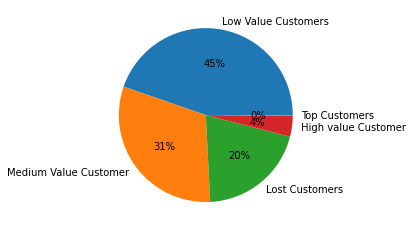

In [29]:
from matplotlib import pyplot as plt
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()